<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [171]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [172]:
iowa_path = 'C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa= pd.read_csv(iowa_path)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [173]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [174]:
iowa.sort(['Category','Category Name'], ascending=True)
iowa.tail(5)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


In [175]:
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [176]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [177]:
#Renaming all my variables
iowa.rename(columns={
   'Date':'date',
   'Store Number':'store_numb',
   'City':'city',
   'Zip Code':'zip_code',
   'County Number':'county_numb',
   'County':'county',
   'Category':'category',
   'Category Name':'category_name',
   'Vendor Number':'vendor_numb',
   'Item Number':'item_numb',
   'Item Description':'item_descrip',
   'Bottle Volume (ml)':'bottle_volume',
   'State Bottle Cost':'state_bottle_cost',
   'State Bottle Retail':'state_bottle_retail'   
  
   }, inplace=True)


In [178]:
#Renaming my variables
iowa.rename(columns={
  'Bottles Sold' : 'bottles_sold',
   'Sale (Dollars)': 'sale_dollars',
   'Volume Sold (Liters)':'volume_sold_liter',
   'Volume Sold (Gallons)':'volume_sold_gallon' 
  
   }, inplace=True)



In [179]:
iowa.isnull().sum()

date                      0
store_numb                0
city                      0
zip_code                  0
county_numb            1077
county                 1077
category                 68
category_name           632
vendor_numb               0
item_numb                 0
item_descrip              0
bottle_volume             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liter         0
volume_sold_gallon        0
dtype: int64

We see that we have issues with 4 variables that have missing values.
County and County Number  have same number of missing observations.
Cities belong to counties. So for missing values of counties, since there's no missing value for City variable, we will map cities that have counties values, with those same cities that have counties missing observations.

Category and Category Name normally should same number of missing values, but they don't.
So we will do the same mapping idea described above, to reduce the number of missing values for Category Name.


In [180]:
#iowa['Category'].dropna(axis=0, inplace=True)
#sum(iowa['Category'].isnull().values.ravel())

In [181]:
iowa.loc[iowa['category_name'].isnull()]

,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,item_numb,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon
896,02/05/2015,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,$23.58,$35.37,6,$212.22,4.50,1.19
901,02/25/2016,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,$5.74,$8.61,24,$206.64,4.80,1.27
1514,02/18/2016,2515,MASON CITY,50401,17.0,Cerro Gordo,1082100.0,NaN,420,67487,Grand Marnier Raspberry Peach,750,$23.31,$34.97,2,$69.94,1.50,0.40
1684,02/08/2016,3747,SIGOURNEY,52591,54.0,Keokuk,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,$18.99,$28.49,2,$56.98,1.50,0.40
2203,02/16/2016,4589,SIBLEY,51249,72.0,Osceola,1032100.0,NaN,115,34821,Svedka Vodka,1750,$14.74,$22.11,2,$44.22,3.50,0.92
2894,02/09/2016,2413,DUBUQUE,52001,31.0,Dubuque,1082100.0,NaN,130,64136,Disaronno Amaretto,750,$13.86,$20.79,12,$249.48,9.00,2.38
3071,02/15/2016,2539,IOWA FALLS,50126,42.0,Hardin,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,$18.99,$28.49,3,$85.47,2.25,0.59
3482,02/10/2016,3524,AMES,50010,85.0,Story,1032100.0,NaN,115,34821,Svedka Vodka,1750,$14.74,$22.11,6,$132.66,10.50,2.77
4596,02/03/2016,2594,SIOUX CITY,51106,97.0,Woodbury,1052100.0,NaN,420,48099,Hennessy VS,200,$5.74,$8.61,1,$8.61,0.20,0.05
4989,02/23/2016,2620,WINDSOR HEIGHTS,50311,77.0,Polk,1091100.0,NaN,208,27439,Tim Smith's Climax Moonshine,750,$17.50,$26.25,6,$157.50,4.50,1.19


In [182]:
#We locate the row 896 to see all the details about it.

iowa.loc[896]

date                                     02/05/2015
store_numb                                     4829
city                                     DES MOINES
zip_code                                      50314
county_numb                                      77
county                                         Polk
category                                 1.0222e+06
category_name                                   NaN
vendor_numb                                      85
item_numb                                      3657
item_descrip           Herradura Gold Reposado 6pak
bottle_volume                                   750
state_bottle_cost                            $23.58
state_bottle_retail                          $35.37
bottles_sold                                      6
sale_dollars                                $212.22
volume_sold_liter                               4.5
volume_sold_gallon                             1.19
Name: 896, dtype: object

In [183]:
#We see that Category Name is missing, whereas Category is not, and also Item Number is not missing
#So we plan to groupby item number, and replace those who have missing values within that group with the non-missing value, since it is the same


In [184]:
#This is to group category names within each item number, and observe

group= iowa.groupby(['item_numb', 'category_name'])[['category']].count().reset_index()
group.head (5)

,item_numb,category_name,category
0,168,DECANTERS & SPECIALTY PACKAGES,1
1,173,DECANTERS & SPECIALTY PACKAGES,10
2,220,DECANTERS & SPECIALTY PACKAGES,1
3,238,DECANTERS & SPECIALTY PACKAGES,1
4,249,DECANTERS & SPECIALTY PACKAGES,2


For example, for the item number 173, the category name is DECANTERS... So,there are 10 observations within that item number group with the same name. If there are missing values for some observations for Category name within that group, we can surely replace the name by the same name of non missing observations.

In [185]:
#The command below performs what is described above, and the term 'first' means to replace
#the missing values by the first non-missing value within that group.
iowa['category_name']=iowa.groupby('item_numb')['category_name'].transform('first')

iowa.isnull().sum()


date                      0
store_numb                0
city                      0
zip_code                  0
county_numb            1077
county                 1077
category                 68
category_name            57
vendor_numb               0
item_numb                 0
item_descrip              0
bottle_volume             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liter         0
volume_sold_gallon        0
dtype: int64

We see that the number of missing observations for Category namereduced from 632 to 57.
Each category corresponds to a category name, so we can have the same process, and reduce missing observations for category from  68 to 57.

In [186]:
#http://stackoverflow.com/questions/39373820/is-pandas-dataframe-groupby-guaranteed-to-be-stable
#Then we apply the same for category variable, meaning replacing the missing value for category
#name observation with the first non missing observation in that category.
iowa['category']=iowa.groupby('category_name')['category'].transform('first')

iowa.isnull().sum()

date                      0
store_numb                0
city                      0
zip_code                  0
county_numb            1077
county                 1077
category                 57
category_name            57
vendor_numb               0
item_numb                 0
item_descrip              0
bottle_volume             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liter         0
volume_sold_gallon        0
dtype: int64

We see that the number of observations for category reduced to 57 as well

NOW WE HANDLE MISSING DATA FOR COUNTY AND COUNTY NUMBER (1077 missing values)

In [187]:
#First we group by city and county, and we count the number of observations within the group 
group1=iowa.groupby(['city', 'county'])[['county_numb']].count().reset_index()
group1.head(10)

,city,county,county_numb
0,ACKLEY,Hardin,57
1,ACKLEY,Webster,34
2,ADAIR,Adair,43
3,ADEL,Dallas,318
4,AFTON,Union,12
5,AKRON,Plymouth,69
6,ALBIA,Monroe,342
7,ALDEN,Hardin,122
8,ALGONA,Kossuth,1025
9,ALLISON,Butler,83


Problem: We can see that some cities like ACKLEY belong in two counties, and if we try to group by city, and transform, it is going to randomly assign one county to missing values within group city.

In [188]:
print iowa[iowa["city"]=='ACKLEY'].count()["city"]
print iowa[iowa["city"]=='BETTENDORF'].count()["city"]
print iowa[iowa["city"]=='CLIVE'].count()["city"]
print iowa[iowa["city"]=='CORNING'].count()["city"]
print iowa[iowa["city"]=='FORT DODGE'].count()["city"]
print iowa[iowa["city"]=='NEWTON'].count()["city"]
print iowa[iowa["city"]=='NORTH LIBERTY'].count()["city"]
print iowa[iowa["city"]=='OSKALOOSA'].count()["city"]
print iowa[iowa["city"]=='PERRY'].count()["city"]
print iowa[iowa["city"]=='STATE CENTER'].count()["city"]
print iowa[iowa["city"]=='WEST DES MOINES'].count()["city"]

105
3709
935
444
2989
2544
1321
1516
815
170
7162


For city ACKLEY for example, there are we have 91 observations in both counties, but the counting option gives us 105, so there are 14 missing observations in both county group. We need to drop those specific observations.

In [189]:
#Here we replace missing value with 0 to be able to specify a new dataset containing non 
#missing values from a column and a specific cities
iowa['county'].fillna(0, inplace=True)

In [190]:
iowa = iowa[(iowa['county'] != 0) | (iowa['city'] != "ACKLEY")]
iowa = iowa[(iowa['county'] != 0) | (iowa['city'] != "FORT DODGE")]
iowa = iowa[(iowa['county'] != 0) | (iowa['city'] != "NORTH LIBERTY")]

iowa.isnull().sum()

date                      0
store_numb                0
city                      0
zip_code                  0
county_numb            1043
county                    0
category                 57
category_name            57
vendor_numb               0
item_numb                 0
item_descrip              0
bottle_volume             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liter         0
volume_sold_gallon        0
dtype: int64

In [191]:
#For the same column, we recenvert the 0 values to missing, after removing the cities with problem
iowa['county'].replace(0, np.NaN, inplace=True)
iowa.isnull().sum()

date                      0
store_numb                0
city                      0
zip_code                  0
county_numb            1043
county                 1043
category                 57
category_name            57
vendor_numb               0
item_numb                 0
item_descrip              0
bottle_volume             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liter         0
volume_sold_gallon        0
dtype: int64

In [192]:
#Then we apply the same for county variable
#We group all observations by city, and then within each group, 
#we replace missing values by the corresponding non-missing value of the group
iowa['county']=iowa.groupby('city')['county'].transform('first')

iowa['county_numb']=iowa.groupby('county')['county_numb'].transform('first')
iowa.isnull().sum()


date                    0
store_numb              0
city                    0
zip_code                0
county_numb            12
county                 12
category               57
category_name          57
vendor_numb             0
item_numb               0
item_descrip            0
bottle_volume           0
state_bottle_cost       0
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liter       0
volume_sold_gallon      0
dtype: int64

At the end, we only have 12 missing observations for county, and 57 missing for category.


### 3.2 Clean the columns

Some variables with object type such as Sale, State Bottle Cost, and State Bottle Retail in float (Removing the $ sign)

In [193]:
# Changing variables types (Removing $ sign in front of values
iowa['state_bottle_cost'] = iowa['state_bottle_cost'].map(lambda x: x.lstrip('$'))
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].map(lambda x: x.lstrip('$'))
iowa['sale_dollars'] = iowa['sale_dollars'].map(lambda x: x.lstrip('$'))
iowa.head(3)

,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,item_numb,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34


We see that The $ sign is removed. But we still need to convert the string in float.

In [194]:
#Correcting Variable Types after we removed the $ sign..
iowa['state_bottle_cost']= iowa['state_bottle_cost'].apply(float)
iowa['state_bottle_retail']= iowa['state_bottle_retail'].apply(float)
iowa['sale_dollars']= iowa['sale_dollars'].apply(float)

#iowa['county_numb']= iowa['county_numb'].apply(int)

iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270921 entries, 0 to 270954
Data columns (total 18 columns):
date                   270921 non-null object
store_numb             270921 non-null int64
city                   270921 non-null object
zip_code               270921 non-null object
county_numb            270909 non-null float64
county                 270909 non-null object
category               270864 non-null float64
category_name          270864 non-null object
vendor_numb            270921 non-null int64
item_numb              270921 non-null int64
item_descrip           270921 non-null object
bottle_volume          270921 non-null int64
state_bottle_cost      270921 non-null float64
state_bottle_retail    270921 non-null float64
bottles_sold           270921 non-null int64
sale_dollars           270921 non-null float64
volume_sold_liter      270921 non-null float64
volume_sold_gallon     270921 non-null float64
dtypes: float64(7), int64(5), object(6)
memory usage: 39.3+


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

Although I did not follow the order of the questions, this section can be found the previous work, where we extensively investigated the data, and dealt with the missing ones.

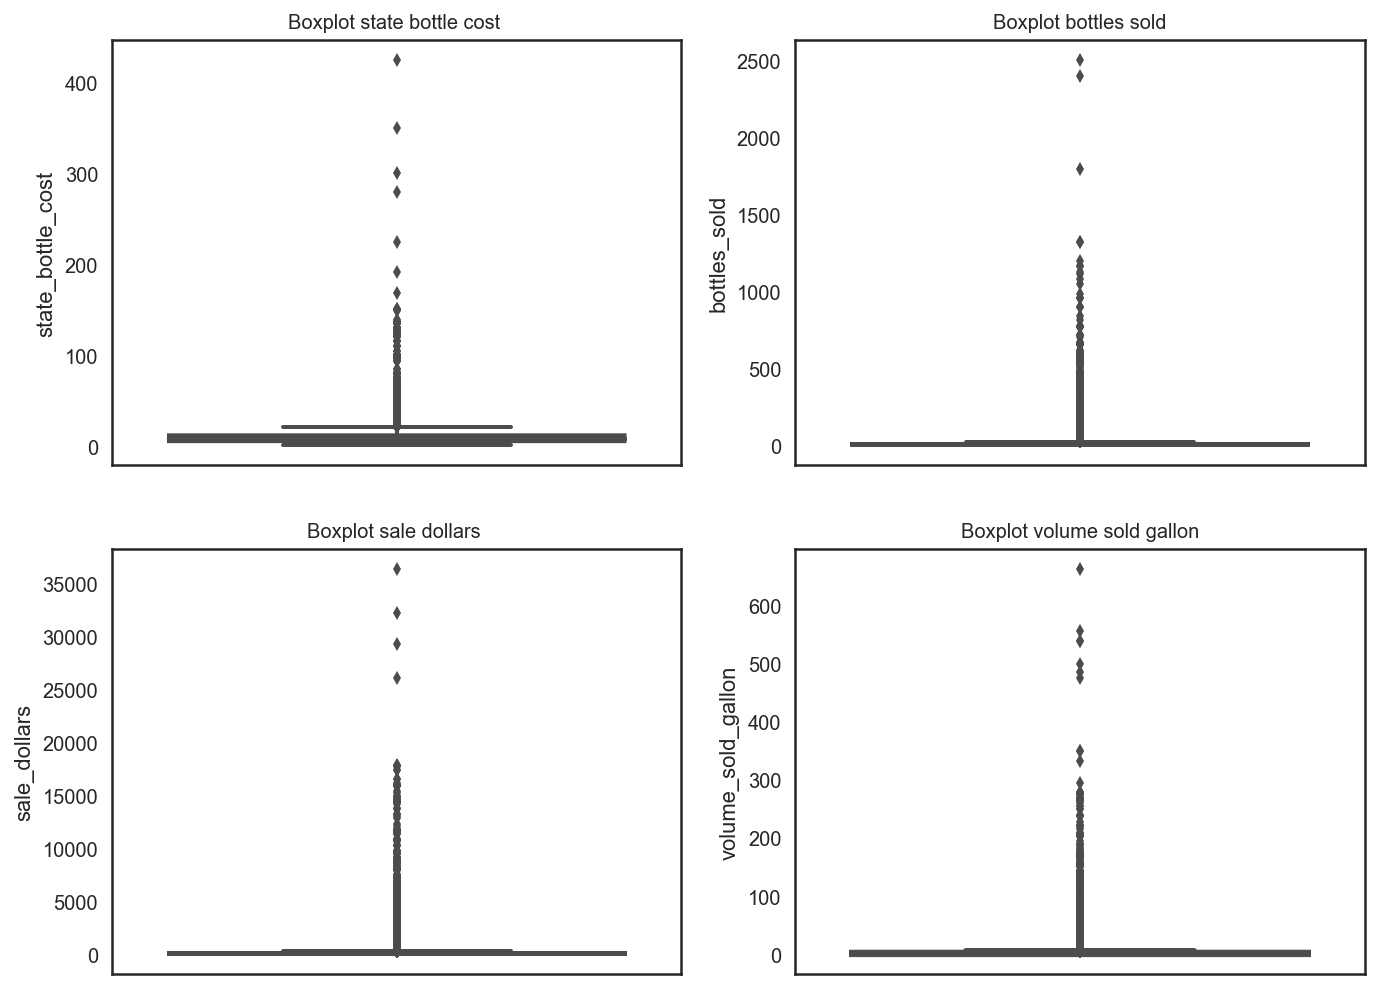

In [201]:
#First plotting boxplots to check some outliers for main variables
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style('white')
    
fig, axarr = plt.subplots(2, 2, figsize=(10,8),
                         sharex=False, sharey=False)
axarr[0,0] = sns.boxplot(iowa['state_bottle_cost'], orient='v',
             linewidth=2, notch=True, 
            saturation=0.5, ax=axarr[0,0], color="red")
axarr[0,0].set_title('Boxplot state bottle cost ', fontsize=10)
    
axarr[0,1] = sns.boxplot(iowa['bottles_sold'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[0,1], color="blue")
axarr[0,1].set_title('Boxplot bottles sold', fontsize=10)
    
axarr[1,0] = sns.boxplot(iowa['sale_dollars'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[1,0], color="yellow")
axarr[1,0].set_title('Boxplot sale dollars ', fontsize=10)
    
axarr[1,1] = sns.boxplot(iowa['volume_sold_gallon'], orient='v',
             linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[1,1], color="limegreen")
axarr[1,1].set_title('Boxplot volume sold gallon',  fontsize=10)

We can see that there are outliers in our main variables, we need to remove them

In [203]:
#http://stackoverflow.com/questions/36864917/python-remove-outliers-from-data
#First we calculate summary statistics
#grouped = iowa.groupby('store_numb')
#statBefore = pd.DataFrame({'q1': grouped['Value'].quantile(.25), \
#'median': grouped['Value'].median(), 'q3' : grouped['Value'].quantile(.75)})

In [ ]:
#http://stackoverflow.com/questions/36864917/python-remove-outliers-from-data
#Then removing outliers

def outliers(observ):
    iq_range = statBefore.loc[observ.store_numb]['q3'] - statBefore.loc[observ.store_numb]['q1']
    median = statBefore.loc[observ.ID]['median']
    if observ.Value > (median + (1.5* iq_range)) or row.Value < (median - (1.5* iq_range)):
        return True
    else:
        return False
#apply the function to the original df:
iowa.loc[:, 'outlier'] = df.apply(is_outlier, axis = 1)
#filter to only non-outliers:
iowa_no_outliers = iowa[~(iowa.outlier)]
iowa_no_outliers

In [209]:
#http://stackoverflow.com/questions/36864917/python-remove-outliers-from-data
#keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
iowa=iowa[np.abs(iowa['sale_dollars']-iowa['sale_dollars'].mean())<=(3*iowa['sale_dollars'].std())]
iowa=iowa[np.abs(iowa['bottles_sold']-iowa['bottles_sold'].mean())<=(3*iowa['bottles_sold'].std())]
iowa=iowa[np.abs(iowa['volume_sold_gallon']-iowa['volume_sold_gallon'].mean())<=(3*iowa['volume_sold_gallon'].std())]
iowa=iowa[np.abs(iowa['state_bottle_cost']-iowa['state_bottle_cost'].mean())<=(3*iowa['state_bottle_cost'].std())]

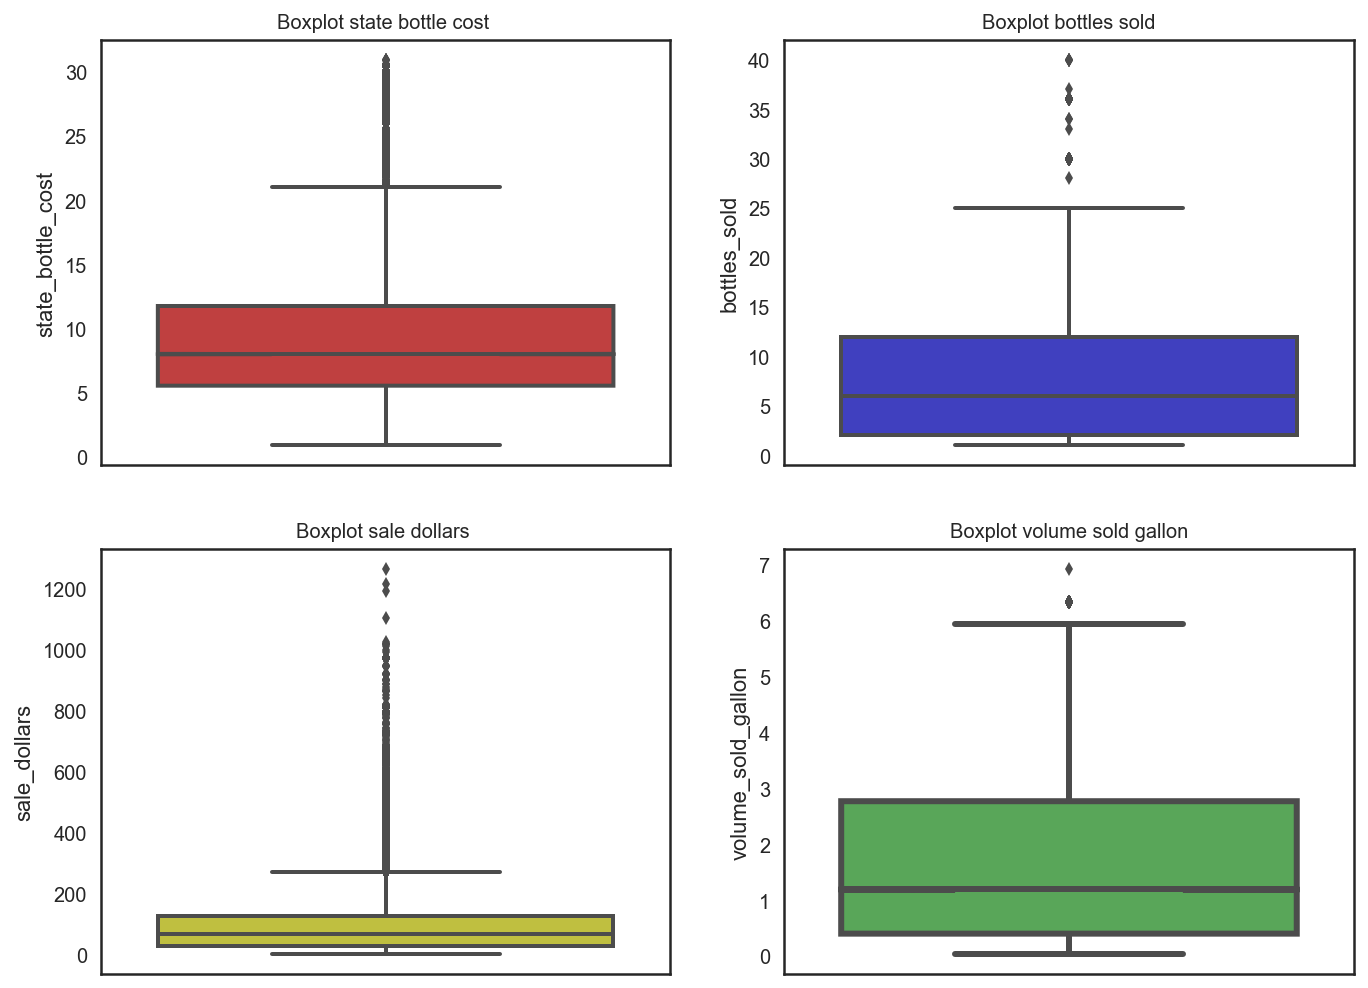

In [210]:
#First plotting boxplots to check some outliers for main variables
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style('white')
    
fig, axarr = plt.subplots(2, 2, figsize=(10,8),
                         sharex=False, sharey=False)
axarr[0,0] = sns.boxplot(iowa['state_bottle_cost'], orient='v',
             linewidth=2, notch=True, 
            saturation=0.5, ax=axarr[0,0], color="red")
axarr[0,0].set_title('Boxplot state bottle cost ', fontsize=10)
    
axarr[0,1] = sns.boxplot(iowa['bottles_sold'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[0,1], color="blue")
axarr[0,1].set_title('Boxplot bottles sold', fontsize=10)
    
axarr[1,0] = sns.boxplot(iowa['sale_dollars'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[1,0], color="yellow")
axarr[1,0].set_title('Boxplot sale dollars ', fontsize=10)
    
axarr[1,1] = sns.boxplot(iowa['volume_sold_gallon'], orient='v',
             linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[1,1], color="limegreen")
axarr[1,1].set_title('Boxplot volume sold gallon',  fontsize=10)

Yay!!! We can see that removed huge outliers in our dataset. Now we the info checking, we only have around 255000 observations from 270955 in the beginning. 

In [216]:
#http://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries
#Here we drop duplicates observations in our dataset. 
#This column will search for all columns, observations that are exactly identicals.
#We could have added the option subset='column name', but here we want to use default option
#by default use all of the columns. set index also set a column for indexes named index
#option keep specifies the one we should keep
iowa = iowa.reset_index().drop_duplicates( keep='last')
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255243 entries, 0 to 255242
Data columns (total 19 columns):
index                  255243 non-null int64
date                   255243 non-null object
store_numb             255243 non-null int64
city                   255243 non-null object
zip_code               255243 non-null object
county_numb            255243 non-null float64
county                 255243 non-null object
category               255243 non-null float64
category_name          255243 non-null object
vendor_numb            255243 non-null int64
item_numb              255243 non-null int64
item_descrip           255243 non-null object
bottle_volume          255243 non-null int64
state_bottle_cost      255243 non-null float64
state_bottle_retail    255243 non-null float64
bottles_sold           255243 non-null int64
sale_dollars           255243 non-null float64
volume_sold_liter      255243 non-null float64
volume_sold_gallon     255243 non-null float64
dtypes: float6

In [217]:
#Dropping all missing observations after extensive cleaning
iowa.dropna(axis=0, inplace=True)
iowa.isnull().sum()

index                  0
date                   0
store_numb             0
city                   0
zip_code               0
county_numb            0
county                 0
category               0
category_name          0
vendor_numb            0
item_numb              0
item_descrip           0
bottle_volume          0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liter      0
volume_sold_gallon     0
dtype: int64


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [218]:
#Here I'm creating new column month from the column date, that will only contain the month the store operate
iowa['date'] = pd.to_datetime(iowa['date'])
iowa['month'] = iowa['date'].dt.month
iowa['year']=iowa['date'].dt.year

In [219]:
#I'm just creating a subset data containing three variables, to work easily
df= pd.DataFrame(iowa, columns=['store_numb', 'month', 'year'] )
df= df.sort(['store_numb', 'month', 'year'], ascending=True)
df.head(3000)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,store_numb,month,year
2360,2106,1,2015
12759,2106,1,2015
21199,2106,1,2015
34470,2106,1,2015
44835,2106,1,2015
53807,2106,1,2015
55082,2106,1,2015
61364,2106,1,2015
62436,2106,1,2015
66243,2106,1,2015


In [220]:
#Counting the number of unique values of months opened for each store number, and each year
#This command will group by store number, and within each store number, since 
#there are repeating values for the number of months, we want to count the number of unique
#observations (months) operated for a specific year.
#This is a new dataframe
df2= iowa.groupby(['store_numb', 'year'])['month'].nunique().reset_index() 

df2


,store_numb,year,month
0,2106,2015,12
1,2106,2016,3
2,2113,2015,12
3,2113,2016,3
4,2130,2015,12
5,2130,2016,3
6,2152,2015,12
7,2152,2016,3
8,2178,2015,12
9,2178,2016,3


We can see some stores operated in both 2015 and 2016 while others only operated in 2015. There are cases where stores only opened few months within a year, and others started in the middle. We need to deal with that because inconsistency in number of months opened within a year can bias the analysis.

In [221]:
#Here we can see the same way as before, but see the number of unique months within each store
iowa.groupby(['store_numb', 'year'])['month'].unique().reset_index() 

,store_numb,year,month
0,2106,2015,"[3, 7, 1, 8, 12, 10, 4, 9, 5, 2, 6, 11]"
1,2106,2016,"[2, 1, 3]"
2,2113,2015,"[10, 5, 3, 12, 6, 1, 9, 7, 11, 2, 8, 4]"
3,2113,2016,"[3, 1, 2]"
4,2130,2015,"[10, 11, 1, 8, 12, 6, 7, 5, 2, 4, 3, 9]"
5,2130,2016,"[3, 2, 1]"
6,2152,2015,"[11, 12, 7, 8, 1, 3, 5, 10, 6, 9, 2, 4]"
7,2152,2016,"[2, 3, 1]"
8,2178,2015,"[3, 11, 1, 8, 2, 5, 7, 6, 10, 4, 9, 12]"
9,2178,2016,"[1, 2, 3]"


For example, we can see that store 2106 only operated in January, February, and March in 2016

In [222]:
#Here I'm locating only for one observation to see if it matches with the big dataset
df2.loc[df2['store_numb']==9013] 

,store_numb,year,month
2666,9013,2015,1
2667,9013,2016,2


We can see that it is aligned with the number of unique months store operated for each year

In [223]:
#Here we rename the variable month in the iowa dataset before the merging to avoid name issues
iowa.rename(columns={
   'month':'months'  
    }, inplace=True)


Now we created a new dataset that contains number of unique months, and since now each store has a unique 

In [224]:
#Now we merge both datasets and we are only interested to observe number of unique months
#We use a merging using store number and year 
iowa15= pd.merge(iowa, df2, on=['store_numb', 'year'], how='right') 
iowa15.head()

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,month
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,750,4.50,6.75,12,81.00,9.00,2.38,11,2015,12
1,15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,750,4.50,6.75,4,27.00,3.00,0.79,6,2015,12
2,3292,2015-01-21,3717,SUMNER,50674,9.0,Bremer,1081300.0,PEPPERMINT SCHNAPPS,322,...,750,10.00,15.00,2,30.00,1.50,0.40,1,2015,12
3,3399,2015-11-11,3717,SUMNER,50674,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,...,1000,6.63,9.95,2,19.90,2.00,0.53,11,2015,12
4,3691,2015-01-07,3717,SUMNER,50674,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,...,750,16.79,25.19,1,25.19,0.75,0.20,1,2015,12


Now we have a new dataset with unique number of month for each store and for each year.
The idea now is that, if we want to analyze on for the store that opened in 2015, we can restrict the dataset to year 2015, and if we want to do a prediction on the stores that opened for all 12 months(full year), then we add the restriction if month==12.
Or if we want to analyze on stores that operated less than 6 months or between 1 and 12 months, it is easier to just restrict the condition on number of unique months operated.




In [225]:
#http://stackoverflow.com/questions/22546425/using-pandas-to-select-rows-conditional-on-multiple-equivalencies
#Restricting the new dataframe to only 2015
iowa15= iowa15[(iowa15['year'] != 2016)]
iowa15.loc[iowa15['year']==2016]


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,month


We can see that when locating stores that opened in 2016 in our new restricted dataset, we don't have anymore 2016.


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [227]:
#What we do here is first creating a new dataset that will calculate the sum of sales for each store
#in 2015, and them since the new dataset has unique indexes, we will merge using a m:1 merging
#to the original dataset

sale=iowa15.groupby(["store_numb"]).sum()["sale_dollars"].reset_index() 
sale.rename(columns={
   'sale_dollars':'sum_sales'  
    }, inplace=True)

iowa15= pd.merge(iowa15, sale, on=['store_numb'], how='right') 
iowa15

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,month,sum_sales
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,4.50,6.75,12,81.00,9.00,2.38,11,2015,12,9022.86
1,15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,4.50,6.75,4,27.00,3.00,0.79,6,2015,12,9022.86
2,3292,2015-01-21,3717,SUMNER,50674,9.0,Bremer,1081300.0,PEPPERMINT SCHNAPPS,322,...,10.00,15.00,2,30.00,1.50,0.40,1,2015,12,9022.86
3,3399,2015-11-11,3717,SUMNER,50674,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,...,6.63,9.95,2,19.90,2.00,0.53,11,2015,12,9022.86
4,3691,2015-01-07,3717,SUMNER,50674,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,...,16.79,25.19,1,25.19,0.75,0.20,1,2015,12,9022.86
5,3778,2015-02-18,3717,SUMNER,50674,9.0,Bremer,1012300.0,IRISH WHISKIES,370,...,11.88,17.82,1,17.82,0.60,0.16,2,2015,12,9022.86
6,4073,2015-08-19,3717,SUMNER,50674,9.0,Bremer,1062300.0,FLAVORED RUM,65,...,6.83,10.25,1,10.25,0.75,0.20,8,2015,12,9022.86
7,5611,2015-12-09,3717,SUMNER,50674,9.0,Bremer,1012100.0,CANADIAN WHISKIES,260,...,15.00,22.50,2,45.00,1.50,0.40,12,2015,12,9022.86
8,8237,2015-02-04,3717,SUMNER,50674,9.0,Bremer,1081200.0,CREAM LIQUEURS,305,...,7.42,11.13,1,11.13,0.50,0.13,2,2015,12,9022.86
9,12061,2015-12-22,3717,SUMNER,50674,9.0,Bremer,1031200.0,VODKA FLAVORED,380,...,7.50,11.25,5,56.25,5.00,1.32,12,2015,12,9022.86


### 5.2 Calculate the profit each store is making in 2015.


In [228]:
#The variable is called profit, and we perform the same process as we did before.
#Calculating the total cost, and the profit
iowa15['total_cost']=iowa15['state_bottle_cost']*iowa15['bottles_sold']
iowa15['profit']= iowa15['sale_dollars']- iowa15['total_cost']


sumprofit=iowa15.groupby(["store_numb"]).sum()["profit"].reset_index() 
sumprofit.rename(columns={
   'profit':'profits'  
    }, inplace=True)
iowa15= pd.merge(iowa15, sumprofit, on=['store_numb'], how='right') 

iowa15.head(5)

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,month,sum_sales,total_cost,profit,profits
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,81.00,9.00,2.38,11,2015,12,9022.86,54.00,27.00,3011.02
1,15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,27.00,3.00,0.79,6,2015,12,9022.86,18.00,9.00,3011.02
2,3292,2015-01-21,3717,SUMNER,50674,9.0,Bremer,1081300.0,PEPPERMINT SCHNAPPS,322,...,30.00,1.50,0.40,1,2015,12,9022.86,20.00,10.00,3011.02
3,3399,2015-11-11,3717,SUMNER,50674,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,...,19.90,2.00,0.53,11,2015,12,9022.86,13.26,6.64,3011.02
4,3691,2015-01-07,3717,SUMNER,50674,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,...,25.19,0.75,0.20,1,2015,12,9022.86,16.79,8.40,3011.02


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

For this question, since it is not specified whether we have to find average profit on liquor per gallon or the sum of profits per gallon for each item, we implemented both methods, and we try to identify the counties with the highest values

In [229]:
#METHOD1: Calculating the average profit per gallon per county
#Here we first sum the profits for each county, as well as the volume per gallons,
#and we divide total profits/total volume gallon

county_profit=iowa15.groupby(["county"]).sum()["profit"].reset_index()
county_gallon=iowa15.groupby(['county']).sum()['volume_sold_gallon'].reset_index()
df7= pd.merge(county_profit, county_gallon, on=['county'], how='right')
df7['avg_profit_per_gallon']=df7['profit']/df7['volume_sold_gallon']

print df7.sort_values(by=['avg_profit_per_gallon'], ascending=False)

           county      profit  volume_sold_gallon  avg_profit_per_gallon
50        Johnson   361553.67            18107.67              19.966880
75           Polk  1218525.17            61228.71              19.901206
80          Scott   421537.54            21440.18              19.661101
27     Des Moines   108373.45             5525.27              19.614146
95       Woodbury   230023.01            11855.54              19.402154
5      Black Hawk   347220.15            18099.66              19.183794
9     Buena Vista    46073.23             2417.47              19.058450
83          Story   198718.74            10495.97              18.932861
55           Linn   545532.72            28857.82              18.904156
42          Henry    28049.88             1496.04              18.749418
76  Pottawattamie   226296.80            12073.69              18.742969
62       Marshall    75787.25             4051.22              18.707266
54            Lee    88922.26             4771.89  

The output shows that the first five counties that have the highest average profit per gallon are Johnson, Polk, Scott, Des Moines and Woodbury

In [230]:
#METHOD2: Calculating the sum of average profit per gallon for all items per county
#Here we first calculate for each item, the profit per gallon,
#then we sum all of the profits for all items per gallon in each county


iowa15['profit_per_gallon']=iowa15['profit']/iowa15['volume_sold_gallon']

county_prof=iowa15.groupby(['county']).sum()['profit_per_gallon'].reset_index()
county_prof.rename(columns={
   'profit_per_gallon':'profits_per_gallons'  
    }, inplace=True)
iowa15= pd.merge(iowa15, county_prof, on=['county'], how='right') 

#Investigating which counties make the most Profits per gallon
print county_prof.sort_values(by=['profits_per_gallons'], ascending=False)

           county  profits_per_gallons
75           Polk        875467.438129
55           Linn        412964.403519
80          Scott        292783.343184
5      Black Hawk        256500.937045
50        Johnson        234729.838447
83          Story        156201.617834
76  Pottawattamie        151790.762878
95       Woodbury        149466.508504
29        Dubuque        127884.250152
15    Cerro Gordo        104670.232464
27     Des Moines         71628.372655
68      Muscatine         67026.377027
21        Clinton         60795.311596
88        Wapello         59484.033295
54            Lee         58672.712431
28      Dickinson         58574.005583
92        Webster         52517.578195
48         Jasper         51270.382279
62       Marshall         48203.793862
9     Buena Vista         47334.563201
23         Dallas         46875.723529
61         Marion         44751.807853
89         Warren         38059.062606
7          Bremer         36609.596437
77      Poweshiek        

Using this method, we see that the first five counties that have more of of profits per gallon of all items sold in the county are Polk, Linn, Scott, Black Hawk, and Johnson

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [231]:
iowa.head(2)

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,11,2015
1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,...,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,2016


In [232]:
#We create subsets of data to calculate profit-volume ratio
df0=iowa15.groupby(["store_numb"]).sum()["profit"].reset_index()
df0.rename(columns={
   'profit':'profit_size'  
    }, inplace=True)
df1=iowa15.groupby(['store_numb']).sum()['volume_sold_gallon'].reset_index()
df1.rename(columns={
   'volume_sold_gallon':'store_size'  
    }, inplace=True)
df2= pd.merge(df0, df1, on=['store_numb'], how='right')
df2['profit_vol_ratio']=df2['profit_size']/df2['store_size']

print df2.sort_values(by=['store_size'], ascending=True)

      store_numb  profit_size  store_size  profit_vol_ratio
1364        5215        18.68        0.48         38.916667
800         4567        15.06        0.79         19.063291
1360        5205        13.34        0.93         14.344086
1120        4939        17.81        1.15         15.486957
1352        5192        30.00        1.19         25.210084
1222        5056        58.24        1.81         32.176796
1339        5178        60.83        1.98         30.722222
1336        5175        74.99        2.05         36.580488
1357        5201        96.65        2.28         42.390351
1353        5193        46.53        2.37         19.632911
1368        9013        55.08        2.38         23.142857
433         4059        35.15        2.91         12.079038
988         4778       102.00        3.88         26.288660
1188        5020        88.44        3.97         22.277078
1346        5186        99.72        4.36         22.871560
1051        4855       132.60        4.7

In [233]:
df2[['profit_vol_ratio','store_size']].corr() 

,profit_vol_ratio,store_size
profit_vol_ratio,1.000000,0.018243
store_size,0.018243,1.000000


The correlation coefficient is very low, close to 0, so we can not conclude that both variables are correlated. Even when we sorted by store size above, and looked at the ratio, we saw inconsistency in the rankings

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [234]:
#Here I'm counting observations by category names for liquors
#This allows to see the main categories, and the ones we can group as other
iowa15.groupby(['category_name']).count()['category'].reset_index()


,category_name,category
0,100 PROOF VODKA,2931
1,AMERICAN ALCOHOL,485
2,AMERICAN AMARETTO,1071
3,AMERICAN COCKTAILS,5474
4,AMERICAN DRY GINS,5114
5,AMERICAN GRAPE BRANDIES,5059
6,AMERICAN SLOE GINS,147
7,ANISETTE,27
8,APPLE SCHNAPPS,633
9,APRICOT BRANDIES,1012


In [238]:
#http://stackoverflow.com/questions/30649713/python-pandas-dataframe-conditional-if-elif-else
#Here I'm creating a new variable in my full dataset
iowa15['type_liquor'] = np.where(iowa15['category_name'].str.contains('BRANDIES') , "BRANDIES",
             np.where(iowa15['category_name'].str.contains('WHISKIES'), "WHISKIES", 
             np.where(iowa15['category_name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
             np.where(iowa15['category_name'].str.contains('SCOTCH'), "SCOTCH", 
              np.where(iowa15['category_name'].str.contains('GINS'), "GINS",
              np.where(iowa15['category_name'].str.contains('VODKA'), "VODKA",
             np.where(iowa15['category_name'].str.contains('ALCOHOL'), "ALCOHOL",
             np.where(iowa15['category_name'].str.contains('COCKTAILS'), "COCKTAILS",
            np.where(iowa15['category_name'].str.contains('LIQUEUR'), "LIQUEUR",
            np.where(iowa15['category_name'].str.contains('GINS'), "GINS",
            np.where(iowa15['category_name'].str.contains('RUM'), "RUM", "OTHER" )))))))))))
iowa15.groupby(['type_liquor']).count()['category'].reset_index().sort_values(['category'], ascending=False)

,type_liquor,category
10,WHISKIES,53193
9,VODKA,52810
6,RUM,25255
4,LIQUEUR,21883
5,OTHER,14135
7,SCHNAPPS,11890
1,BRANDIES,11508
3,GINS,7836
2,COCKTAILS,5474
8,SCOTCH,1257


Now we can see that we only have 10 broad categories, that we can easily use.

In [239]:
iowa15.head(2)

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,months,year,month,sum_sales,total_cost,profit,profits,profit_per_gallon,profits_per_gallons,type_liquor
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,11,2015,12,9022.86,54.0,27.0,3011.02,11.344538,36609.596437,BRANDIES
1,15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,6,2015,12,9022.86,18.0,9.0,3011.02,11.392405,36609.596437,BRANDIES


### 5.6 Do relationships exist between the broader liquor type and profit?

In [240]:
#Here I will group my data by type of liquor, and analyze the average profit for all items
#in that category, and compare
type_liq= iowa15.groupby(['type_liquor'])['profit'].mean().reset_index()
type_liq.rename(columns={
'profit':'profit_per_type'  
 }, inplace=True)
type_liq.sort(['profit_per_type'], ascending=False)


C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,type_liquor,profit_per_type
0,ALCOHOL,43.122680
8,SCOTCH,40.925107
4,LIQUEUR,34.693132
10,WHISKIES,33.819131
5,OTHER,33.283537
6,RUM,31.514462
9,VODKA,28.705253
1,BRANDIES,28.180699
3,GINS,25.938472
7,SCHNAPPS,24.198947


We can see that the broader category ALCOHOL has the highest average profit 43USD for all items sold in that braoder category, followed by SCOTCH, then LIQUEUR, and WHISKIES. The category COCKTAILS has the lowest average profit for all items sold in that category 20USD.

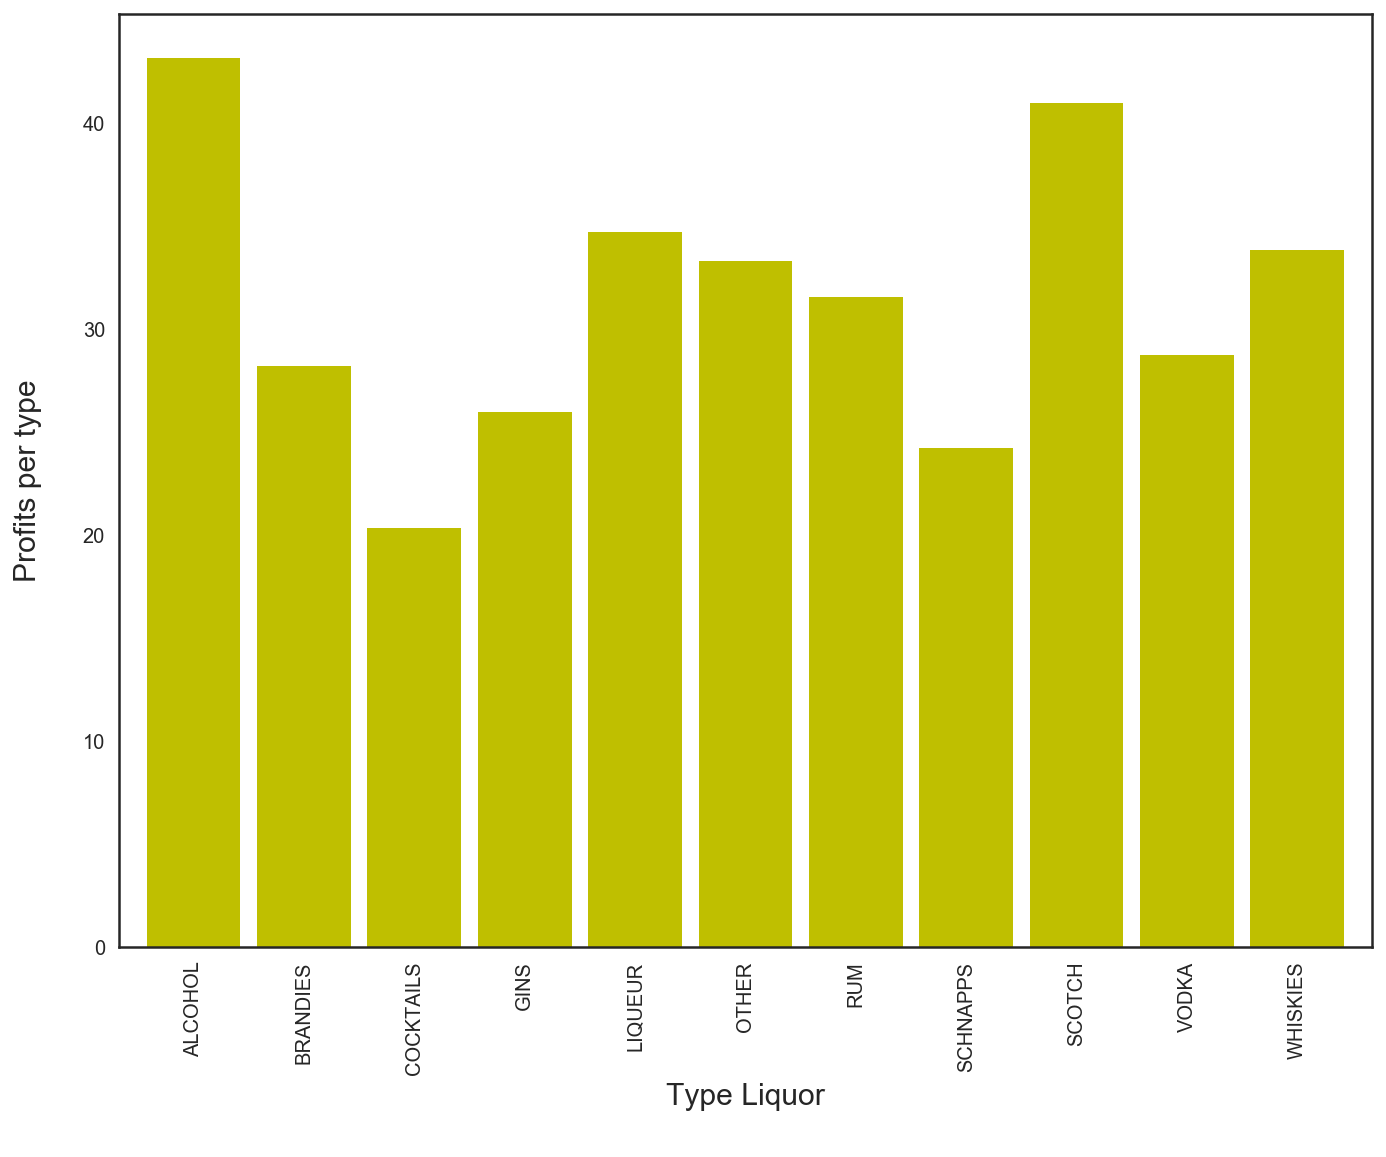

In [241]:
#Creating a bar chart for the table
iowa15.groupby(['type_liquor'])['profit'].mean().plot(kind="bar", color="y", width=0.85)
plt.xlabel('Type Liquor\n', fontsize=15)
plt.ylabel('Profits per type\n', fontsize=15)
plt.show()



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [242]:
#Just counting the number of items per brand
brand= iowa15.groupby(['item_descrip'])['profit'].count().reset_index()
brand.sort(['profit'], ascending=False)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,item_descrip,profit
797,Hawkeye Vodka,4619
228,Black Velvet,4608
702,Five O'clock Vodka,3192
1559,Smirnoff Vodka 80 Prf,2622
1456,Seagrams 7 Crown Bl Whiskey,2568
370,Captain Morgan Spiced Rum,2352
685,Fireball Cinnamon Whiskey,2295
879,Jack Daniels Old #7 Black Lbl,2264
52,Absolut Swedish Vodka 80 Prf,2253
152,Bacardi Superior Rum,2181


In [243]:
#Creating brand variable, so we can group by brand
#Idea is to only extract each first word of item description, since each brand has unique name

iowa15['brand'] = iowa15['item_descrip'].str.extract('([A-Z]\w{0,})', expand=True)
iowa15.head(3)

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,year,month,sum_sales,total_cost,profit,profits,profit_per_gallon,profits_per_gallons,type_liquor,brand
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,2015,12,9022.86,54.0,27.0,3011.02,11.344538,36609.596437,BRANDIES,Mr
1,15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,2015,12,9022.86,18.0,9.0,3011.02,11.392405,36609.596437,BRANDIES,Mr
2,3292,2015-01-21,3717,SUMNER,50674,9.0,Bremer,1081300.0,PEPPERMINT SCHNAPPS,322,...,2015,12,9022.86,20.0,10.0,3011.02,25.000000,36609.596437,SCHNAPPS,Kinky


In [244]:
#Here I will group my data by brand, and analyze the average revenue for all items
#in that category name in 2015, and compare
relation1= iowa15.groupby(['brand'])['sale_dollars'].mean().reset_index()
relation1.rename(columns={
'sale_dollars':'avg_sale_brand'  
 }, inplace=True)

relation1.sort(['avg_sale_brand'], ascending=False)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,brand,avg_sale_brand
55,Benedictine,526.500000
318,Maestro,443.880000
257,Hudson,408.840000
162,Dimple,382.320000
5,Agavero,348.000000
6,Agwa,343.800000
505,Tyrconnell,330.720000
495,Tosolini,303.000000
381,Pernod,287.880000
212,Gibson,285.000000


In [245]:
#Here I will group my data by brand, and analyze the average profit for all items
#in that category name in 2015, and compare

relation2= iowa15.groupby(['brand'])['profit'].mean().reset_index()
relation2.rename(columns={
'profit':'profit_brand'  
 }, inplace=True)
relation2.sort(['profit_brand'], ascending=False)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,brand,profit_brand
55,Benedictine,175.500000
318,Maestro,147.960000
257,Hudson,136.320000
162,Dimple,127.440000
5,Agavero,116.000000
6,Agwa,114.600000
505,Tyrconnell,110.280000
495,Tosolini,101.040000
381,Pernod,96.000000
212,Gibson,95.040000


We can see some relationship here. Calculating the average sales (revenues) provides almost the same ranking when calculating the average profit within each brand.
The brand with highest sale revenue is 'Benedicte', followed by Maestro..The lowest sale revenue for 2015 Mandarin. The pattern is consistent for sale and profit variables, because Mandarin is also among the lowest profits with average profit.

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [246]:
#Observing correlation coefficients between variables
iowa15.corr()


,index,store_numb,county_numb,category,vendor_numb,item_numb,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,...,volume_sold_gallon,months,year,month,sum_sales,total_cost,profit,profits,profit_per_gallon,profits_per_gallons
index,1.000000,0.000573,-0.000206,-0.000164,-0.000292,-0.002447,0.001083,0.004188,0.004212,-0.000019,...,0.001349,0.000496,NaN,-0.000135,0.001721,0.002636,0.002716,0.001718,0.002271,0.001804
store_numb,0.000573,1.000000,0.004816,-0.010354,-0.004770,-0.025029,-0.053892,-0.062614,-0.062836,0.053971,...,-0.027671,0.020721,NaN,-0.286956,-0.453399,-0.019610,-0.019960,-0.453756,0.002107,-0.019746
county_numb,-0.000206,0.004816,1.000000,-0.006611,-0.001673,0.005009,-0.023986,0.010624,0.010579,0.029577,...,0.011332,0.000560,NaN,-0.011957,0.101553,0.032348,0.032317,0.101549,0.032600,0.345070
category,-0.000164,-0.010354,-0.006611,1.000000,0.086958,0.133517,-0.008502,0.014159,0.013876,-0.007598,...,-0.020113,0.055933,NaN,0.008135,0.010662,0.019887,0.019278,0.010663,0.005182,-0.022808
vendor_numb,-0.000292,-0.004770,-0.001673,0.086958,1.000000,0.144559,0.031927,-0.005178,-0.005603,0.011443,...,0.020476,0.001255,NaN,0.003471,0.004562,-0.011311,-0.012224,0.004566,-0.000175,-0.002585
item_numb,-0.002447,-0.025029,0.005009,0.133517,0.144559,1.000000,-0.059188,0.013266,0.012887,-0.020843,...,-0.053046,-0.002447,NaN,0.011947,0.050955,-0.002925,-0.003604,0.050941,0.092593,0.018846
bottle_volume,0.001083,-0.053892,-0.023986,-0.008502,0.031927,-0.059188,1.000000,0.364495,0.365745,-0.106369,...,0.462628,-0.005231,NaN,0.035873,0.004038,0.124499,0.126364,0.004085,-0.380865,-0.069929
state_bottle_cost,0.004188,-0.062614,0.010624,0.014159,-0.005178,0.013266,0.364495,1.000000,0.999924,-0.195678,...,0.019819,0.013192,NaN,0.027821,0.103506,0.407090,0.406137,0.103490,0.614679,0.013435
state_bottle_retail,0.004212,-0.062836,0.010579,0.013876,-0.005603,0.012887,0.365745,0.999924,1.000000,-0.195960,...,0.020312,0.013122,NaN,0.027902,0.103567,0.406876,0.406145,0.103553,0.614224,0.013408
bottles_sold,-0.000019,0.053971,0.029577,-0.007598,0.011443,-0.020843,-0.106369,-0.195678,-0.195960,1.000000,...,0.735610,0.004712,NaN,-0.035590,0.093178,0.654362,0.654918,0.093124,-0.139473,0.064516


Since sum of volume sold gallon represent the store size, and we cannot explicitely tax on store size or county, we observe that the only two variables that are highly correlated with volume sold gallon are bottle_sold (0.74) and sale_dollars (0.68). And the relationship is positive, meaning that the higher the volume sold (store size), the higher the sale amount in dollars. meaning that we can implicitely apply a tax on store size sale by implying a tax on sale dollars.
So the idea is that if we apply a higher tax rate on larger sales, we are taxing larger stores as well because the larger the store, the larger the sales.
So we can apply a progressive tax rate when the sales are above a certain level, and a fixed small rate on sales amount below a threshold. So we don't actually charge vendors based on their store size, but on their sales in dollars.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [248]:
#http://stackoverflow.com/questions/22546425/using-pandas-to-select-rows-conditional-on-multiple-equivalencies
#Restricting the new dataframe to only first quarter 2015
iowaq15= iowa[(iowa['months'] == 1) |(iowa['months'] == 2) |(iowa['months'] == 3)] 
iowaq15= iowaq15[(iowa['year']!=2016) ]
#this is just to check whether we have observations for 2016, and it should show nothing
iowaq15.loc[iowaq15['year']==2016]

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year


The result shows that in the new dataset, we only have stores opened in the first quarter.

In [67]:
iowaq15.head(100)

,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,item_numb,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46,1,2015
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77,3,2015
20,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,1.50,0.40,1,2015
21,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38,1,2015
22,2015-03-24,3981,SIOUX CENTER,51250,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,Seagrams 7 Crown Bl Whiskey,750,7.00,10.50,12,126.00,9.00,2.38,3,2015
25,2015-02-03,3390,MILFORD,51351,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,85,26827,Jack Daniels Old #7 Black Lbl,1000,17.90,26.85,24,644.40,24.00,6.34,2,2015
29,2015-01-14,2545,IOWA CITY,52245,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,260,66199,Piehole Apple Pie Mini,500,4.90,7.35,1,7.35,0.50,0.13,1,2015
31,2015-01-12,2555,KEOKUK,52632,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,65,73533,Dekuyper 03,750,12.07,18.11,2,36.22,1.50,0.40,1,2015
32,2015-01-16,2549,INDIANOLA,50125,91.0,Warren,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,1,2015
33,2015-01-13,2644,FORT DODGE,50501,94.0,Webster,1081305.0,APPLE SCHNAPPS,65,82607,Dekuyper Sour Apple,1000,7.62,11.43,12,137.16,12.00,3.17,1,2015


In [249]:
#http://stackoverflow.com/questions/22546425/using-pandas-to-select-rows-conditional-on-multiple-equivalencies
#Restricting the new dataframe to only first quarter 2016
iowaq16= iowa[(iowa['months'] == 1) |(iowa['months'] == 2) |(iowa['months'] == 3)] 
iowaq16= iowaq16[(iowa['year']!=2015) ]
#this is just to check whether we have observations for 2015, and it should show nothing
iowaq16.loc[iowaq16['year']==2015]

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year


In [250]:
iowaq16.sort(['store_numb','months'], ascending=True)


C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,item_descrip,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year
1325,1410,2016-01-14,2106,CEDAR FALLS,50613,7.0,Black Hawk,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,...,Canadian Club w/Glass,750,7.88,11.82,12,141.84,9.00,2.38,1,2016
3596,3827,2016-01-07,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,...,Jim Beam Honey,750,10.49,15.74,12,188.88,9.00,2.38,1,2016
11804,12527,2016-01-21,2106,CEDAR FALLS,50613,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,434,...,Hawkeye Vodka,1000,4.05,6.08,24,145.92,24.00,6.34,1,2016
19432,20650,2016-01-07,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,...,Jim Beam,1000,12.59,18.89,12,226.68,12.00,3.17,1,2016
20582,21877,2016-01-07,2106,CEDAR FALLS,50613,7.0,Black Hawk,1012200.0,SCOTCH WHISKIES,240,...,Clan Macgregor Scotch,1000,6.66,9.99,2,19.98,2.00,0.53,1,2016
22532,23942,2016-01-14,2106,CEDAR FALLS,50613,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,434,...,Hawkeye Vodka,1000,4.05,6.08,24,145.92,24.00,6.34,1,2016
33694,35841,2016-01-21,2106,CEDAR FALLS,50613,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,260,...,Crown Royal Maple,750,15.00,22.50,12,270.00,9.00,2.38,1,2016
36245,38558,2016-01-14,2106,CEDAR FALLS,50613,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,434,...,Korski Vodka,1000,4.32,6.48,12,77.76,12.00,3.17,1,2016
59491,63210,2016-01-07,2106,CEDAR FALLS,50613,7.0,Black Hawk,1022100.0,TEQUILA,395,...,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,24,450.00,24.00,6.34,1,2016
67809,72058,2016-01-07,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081300.0,PEPPERMINT SCHNAPPS,434,...,Arrow Peppermint Schnapps,750,3.42,5.13,12,61.56,9.00,2.38,1,2016


In [251]:
#Creating columns for quaterly sum of sales for each store, and then merging with the main 
#dataset

#For 2015
iowaq15_sum=iowaq15.groupby(['store_numb']).sum()['sale_dollars'].reset_index()
iowaq15_sum.rename(columns={
   'sale_dollars':'quaterly_sum_sale2015'  
    }, inplace=True)
iowa= pd.merge(iowa, iowaq15_sum, on=['store_numb'], how='right')

#For 2016
iowaq16_sum=iowaq16.groupby(['store_numb']).sum()['sale_dollars'].reset_index()
iowaq16_sum.rename(columns={
   'sale_dollars':'quaterly_sum_sale2016'  
    }, inplace=True)
iowa= pd.merge(iowa, iowaq16_sum, on=['store_numb'], how='right')

#Sorting by store number, year and month to observe
iowa.sort(['store_numb','year','months'], ascending=True)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,quaterly_sum_sale2015,quaterly_sum_sale2016
1536,2512.0,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,434.0,...,4.23,6.35,12.0,76.20,12.00,3.17,1.0,2015.0,15455.96,19679.09
1566,13533.0,2015-01-15,2106,CEDAR FALLS,50613,7.0,Black Hawk,1012300.0,IRISH WHISKIES,240.0,...,14.38,21.57,12.0,258.84,9.00,2.38,1.0,2015.0,15455.96,19679.09
1587,22526.0,2015-01-15,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081400.0,TRIPLE SEC,421.0,...,3.01,4.52,12.0,54.24,12.00,3.17,1.0,2015.0,15455.96,19679.09
1617,36665.0,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,370.0,...,3.30,4.95,1.0,4.95,0.50,0.13,1.0,2015.0,15455.96,19679.09
1640,47659.0,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1022100.0,TEQUILA,410.0,...,27.00,40.50,12.0,486.00,9.00,2.38,1.0,2015.0,15455.96,19679.09
1661,57177.0,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081200.0,CREAM LIQUEURS,260.0,...,17.25,25.88,12.0,310.56,12.00,3.17,1.0,2015.0,15455.96,19679.09
1665,58530.0,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,434.0,...,5.30,7.95,12.0,95.40,9.00,2.38,1.0,2015.0,15455.96,19679.09
1676,65214.0,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1062310.0,SPICED RUM,259.0,...,5.78,8.67,12.0,104.04,9.00,2.38,1.0,2015.0,15455.96,19679.09
1679,66346.0,2015-01-08,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081200.0,CREAM LIQUEURS,305.0,...,12.50,18.75,12.0,225.00,9.00,2.38,1.0,2015.0,15455.96,19679.09
1686,70401.0,2015-01-22,2106,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421.0,...,8.67,13.01,12.0,156.12,9.00,2.38,1.0,2015.0,15455.96,19679.09


The missing observations are for the stores that did not operate in 2015, or in 2016

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

First I drop observations/stores that did not operate in both quarters in 2015 and 2016 to make analysis easier. Then I will create the quaterly sales growth rate for each store within each county


In [252]:
#dropping all missing observations
iowa_small= iowa.dropna()
iowa_small.isnull().sum()

index                    0
date                     0
store_numb               0
city                     0
zip_code                 0
county_numb              0
county                   0
category                 0
category_name            0
vendor_numb              0
item_numb                0
item_descrip             0
bottle_volume            0
state_bottle_cost        0
state_bottle_retail      0
bottles_sold             0
sale_dollars             0
volume_sold_liter        0
volume_sold_gallon       0
months                   0
year                     0
quaterly_sum_sale2015    0
quaterly_sum_sale2016    0
dtype: int64

Before we had missing data because some store did not operate in both quarters. Now we don't have anymore missing values, and restricted only on stores having operated both quarters

In [256]:
#Creating a column of growth rate in growth rate quaterly sales 2015-2016
iowa_small['growth_sales']= ((iowa_small['quaterly_sum_sale2016'] - iowa_small['quaterly_sum_sale2015'])/iowa_small['quaterly_sum_sale2015'])*100
iowa_small

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,quaterly_sum_sale2015,quaterly_sum_sale2016,growth_sales
0,0.0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55.0,...,6.75,12.0,81.00,9.00,2.38,11.0,2015.0,1583.13,2510.46,58.575733
1,15.0,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55.0,...,6.75,4.0,27.00,3.00,0.79,6.0,2015.0,1583.13,2510.46,58.575733
2,3292.0,2015-01-21,3717,SUMNER,50674,9.0,Bremer,1081300.0,PEPPERMINT SCHNAPPS,322.0,...,15.00,2.0,30.00,1.50,0.40,1.0,2015.0,1583.13,2510.46,58.575733
3,3399.0,2015-11-11,3717,SUMNER,50674,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115.0,...,9.95,2.0,19.90,2.00,0.53,11.0,2015.0,1583.13,2510.46,58.575733
4,3691.0,2015-01-07,3717,SUMNER,50674,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,...,25.19,1.0,25.19,0.75,0.20,1.0,2015.0,1583.13,2510.46,58.575733
5,3778.0,2015-02-18,3717,SUMNER,50674,9.0,Bremer,1012300.0,IRISH WHISKIES,370.0,...,17.82,1.0,17.82,0.60,0.16,2.0,2015.0,1583.13,2510.46,58.575733
6,3804.0,2016-03-23,3717,SUMNER,50674,9.0,Bremer,1011100.0,BLENDED WHISKIES,260.0,...,12.00,2.0,24.00,2.00,0.53,3.0,2016.0,1583.13,2510.46,58.575733
7,4073.0,2015-08-19,3717,SUMNER,50674,9.0,Bremer,1062300.0,FLAVORED RUM,65.0,...,10.25,1.0,10.25,0.75,0.20,8.0,2015.0,1583.13,2510.46,58.575733
8,5611.0,2015-12-09,3717,SUMNER,50674,9.0,Bremer,1012100.0,CANADIAN WHISKIES,260.0,...,22.50,2.0,45.00,1.50,0.40,12.0,2015.0,1583.13,2510.46,58.575733
9,6700.0,2016-02-10,3717,SUMNER,50674,9.0,Bremer,1081030.0,COFFEE LIQUEURS,370.0,...,23.24,1.0,23.24,1.00,0.26,2.0,2016.0,1583.13,2510.46,58.575733


In [259]:
#I'm creating a dataset where I have  counties that have the sum of quarterly sales in 2016 
#above 50,000USD and growth rate of sales is above 50%
final = iowa_small.loc[(iowa_small['quaterly_sum_sale2016']>20000) & (iowa_small['growth_sales']>50)]
final.sort(['growth_sales'], ascending=False)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,quaterly_sum_sale2015,quaterly_sum_sale2016,growth_sales
135827,501.0,2015-10-15,2130,WATERLOO,50703,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,260.0,...,8.25,12.0,99.00,12.00,3.17,10.0,2015.0,12265.01,20383.23,66.190081
136111,176846.0,2015-06-11,2130,WATERLOO,50703,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,55.0,...,7.41,12.0,88.92,12.00,3.17,6.0,2015.0,12265.01,20383.23,66.190081
136137,191438.0,2015-02-05,2130,WATERLOO,50703,7.0,Black Hawk,1052010.0,IMPORTED GRAPE BRANDIES,65.0,...,12.14,6.0,72.84,2.25,0.59,2.0,2015.0,12265.01,20383.23,66.190081
136136,191246.0,2016-03-31,2130,WATERLOO,50703,7.0,Black Hawk,1081600.0,WHISKEY LIQUEUR,421.0,...,44.58,1.0,44.58,3.00,0.79,3.0,2016.0,12265.01,20383.23,66.190081
136135,191245.0,2015-03-26,2130,WATERLOO,50703,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,461.0,...,15.75,12.0,189.00,9.00,2.38,3.0,2015.0,12265.01,20383.23,66.190081
136134,190755.0,2015-06-25,2130,WATERLOO,50703,7.0,Black Hawk,1032200.0,IMPORTED VODKA - MISC,395.0,...,14.94,12.0,179.28,9.00,2.38,6.0,2015.0,12265.01,20383.23,66.190081
136133,190558.0,2015-06-25,2130,WATERLOO,50703,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421.0,...,16.50,12.0,198.00,12.00,3.17,6.0,2015.0,12265.01,20383.23,66.190081
136132,190220.0,2015-11-12,2130,WATERLOO,50703,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,115.0,...,15.68,6.0,94.08,10.50,2.77,11.0,2015.0,12265.01,20383.23,66.190081
136131,189844.0,2016-01-21,2130,WATERLOO,50703,7.0,Black Hawk,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322.0,...,11.21,2.0,22.42,1.00,0.26,1.0,2016.0,12265.01,20383.23,66.190081
136130,189368.0,2015-11-19,2130,WATERLOO,50703,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,115.0,...,4.61,3.0,13.83,1.12,0.30,11.0,2015.0,12265.01,20383.23,66.190081


BLACK HAWK county is the county respecting my criteria (maximum value

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [260]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 135827 to 165112
Data columns (total 24 columns):
index                    1166 non-null float64
date                     1166 non-null datetime64[ns]
store_numb               1166 non-null int64
city                     1166 non-null object
zip_code                 1166 non-null object
county_numb              1166 non-null float64
county                   1166 non-null object
category                 1166 non-null float64
category_name            1166 non-null object
vendor_numb              1166 non-null float64
item_numb                1166 non-null float64
item_descrip             1166 non-null object
bottle_volume            1166 non-null float64
state_bottle_cost        1166 non-null float64
state_bottle_retail      1166 non-null float64
bottles_sold             1166 non-null float64
sale_dollars             1166 non-null float64
volume_sold_liter        1166 non-null float64
volume_sold_gallon       1166 non-null f

Now I only have 1166 observations following my selection criteria

In [261]:
final.loc[final['county']=='Black Hawk']

,index,date,store_numb,city,zip_code,county_numb,county,category,category_name,vendor_numb,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liter,volume_sold_gallon,months,year,quaterly_sum_sale2015,quaterly_sum_sale2016,growth_sales
135827,501.0,2015-10-15,2130,WATERLOO,50703,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,260.0,...,8.25,12.0,99.00,12.00,3.17,10.0,2015.0,12265.01,20383.23,66.190081
135828,1714.0,2015-11-24,2130,WATERLOO,50703,7.0,Black Hawk,1051010.0,AMERICAN GRAPE BRANDIES,205.0,...,5.25,6.0,31.50,2.25,0.59,11.0,2015.0,12265.01,20383.23,66.190081
135829,2246.0,2015-01-08,2130,WATERLOO,50703,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,260.0,...,23.63,12.0,283.56,12.00,3.17,1.0,2015.0,12265.01,20383.23,66.190081
135830,2493.0,2015-11-05,2130,WATERLOO,50703,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,297.0,...,6.50,12.0,78.00,12.00,3.17,11.0,2015.0,12265.01,20383.23,66.190081
135831,4344.0,2015-10-08,2130,WATERLOO,50703,7.0,Black Hawk,1032200.0,IMPORTED VODKA - MISC,370.0,...,22.49,12.0,269.88,12.00,3.17,10.0,2015.0,12265.01,20383.23,66.190081
135832,4759.0,2015-08-20,2130,WATERLOO,50703,7.0,Black Hawk,1032080.0,IMPORTED VODKA,370.0,...,22.49,24.0,539.76,24.00,6.34,8.0,2015.0,12265.01,20383.23,66.190081
135833,6515.0,2015-12-23,2130,WATERLOO,50703,7.0,Black Hawk,1012200.0,SCOTCH WHISKIES,55.0,...,9.21,12.0,110.52,12.00,3.17,12.0,2015.0,12265.01,20383.23,66.190081
135834,6574.0,2015-01-15,2130,WATERLOO,50703,7.0,Black Hawk,1062310.0,SPICED RUM,260.0,...,27.00,6.0,162.00,10.50,2.77,1.0,2015.0,12265.01,20383.23,66.190081
135835,8855.0,2015-06-11,2130,WATERLOO,50703,7.0,Black Hawk,1081300.0,PEPPERMINT SCHNAPPS,434.0,...,6.09,12.0,73.08,12.00,3.17,6.0,2015.0,12265.01,20383.23,66.190081
135836,9555.0,2015-07-23,2130,WATERLOO,50703,7.0,Black Hawk,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,259.0,...,14.75,6.0,88.50,4.50,1.19,7.0,2015.0,12265.01,20383.23,66.190081


So based on my criteria, I would suggest you my client to locate his/her business in 'Black Hawk' county, in the city WATERLOO, because there is the store that has the highest growth rate in sales between 2015 - 2016(66%), and a sum of sales of 20000USD (the maximum being around 28000USD for 2016. 

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [262]:
#Just creating the type of liquors again, but now for our whole dataset. Before it was only in 2015
#and also profits variable
iowa['type_liquor'] = np.where(iowa['category_name'].str.contains('BRANDIES') , "BRANDIES",
             np.where(iowa['category_name'].str.contains('WHISKIES'), "WHISKIES", 
             np.where(iowa['category_name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
             np.where(iowa['category_name'].str.contains('SCOTCH'), "SCOTCH", 
              np.where(iowa['category_name'].str.contains('GINS'), "GINS",
              np.where(iowa['category_name'].str.contains('VODKA'), "VODKA",
             np.where(iowa['category_name'].str.contains('ALCOHOL'), "ALCOHOL",
             np.where(iowa['category_name'].str.contains('COCKTAILS'), "COCKTAILS",
            np.where(iowa['category_name'].str.contains('LIQUEUR'), "LIQUEUR",
            np.where(iowa['category_name'].str.contains('GINS'), "GINS",
            np.where(iowa['category_name'].str.contains('RUM'), "RUM", "OTHER" )))))))))))

#Calculating the total cost, and the profit for each item
iowa['total_cost']=iowa['state_bottle_cost']*iowa['bottles_sold']
iowa['profit']= iowa['sale_dollars']- iowa['total_cost']

#Since we want to know the average profits within each type of liquor, within  each city, and county
#to be able to suggest a location
sumprofit=iowa.groupby([iowa['county'], iowa['type_liquor']]).mean()["profit"].reset_index() 
sumprofit.rename(columns={
   'profit':'profits'  
    }, inplace=True)
iowa= pd.merge(iowa, sumprofit, on=['county','type_liquor'], how='right')

#Now I sort by a descending order to locate the maximum average profit by type
sumprofit.sort(['profits'], ascending=False )

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,county,type_liquor,profits
693,Monroe,ALCOHOL,81.000000
33,Audubon,LIQUEUR,78.000000
414,Hancock,SCOTCH,73.245000
872,Story,ALCOHOL,67.540800
304,Dubuque,ALCOHOL,60.187500
47,Black Hawk,ALCOHOL,59.250000
121,Carroll,ALCOHOL,56.700000
869,Sioux,SCOTCH,54.633750
326,Fayette,ALCOHOL,54.000000
315,Emmet,ALCOHOL,54.000000


Here we see that after sorting in descending order, the average maximum profits is for ALCOHOL type of liquor, and it's based in Cherokee. So you my client, I would suggest you to specialize in ALCOHOL, and to base your stor in County Fayette, and sell Alcohol because on selling that there will provide you an average profit of USD81 per item, the maximum among all categories. People in that county love bars too much.

In [264]:
#To suggest to my client what other liquors he/she might specialize in, I need to see the profits
#for other types in the county Cherokee

sumprofit.loc[sumprofit['county']=='Monroe'].sort(['profits'], ascending=False)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,county,type_liquor,profits
693,Monroe,ALCOHOL,81.000000
697,Monroe,LIQUEUR,40.301389
703,Monroe,WHISKIES,37.010374
699,Monroe,RUM,36.044200
696,Monroe,GINS,28.450000
698,Monroe,OTHER,27.323077
702,Monroe,VODKA,23.294444
694,Monroe,BRANDIES,23.111667
695,Monroe,COCKTAILS,20.365882
700,Monroe,SCHNAPPS,15.482222


Based on the results, I would suggest my client to diversify the portofolio, especially WHISKIES, LIQUEUR, and RUM because other types also have a high positive profit.

THANK YOU FOR HAVING ME DEAR CLIENT, AND PLEASE DON'T FORGET TO TRANSFER MONEY OF CONSULTATION IN MY BANK ACCOUNT. THE ACCOUNT NUMBER IS 01234PYTHON.